JH:

Planned Changes


**Data Cleansing**


Bundesliga ✔ SB

209 to 2019 ✔ SB

international reputation encode and discuss ✔

Included  "Weak Foot", "Skill Moves" in the encoding too ✔


**Modelling**

Updated Dummy variable script for "International Reputation", "Weak Foot", "Skill Moves" ✔

Start with SVM RBF, drop value

>Here I've added in SVM RBF code, but we need to rework the data to pull in the position categories (GK,DEF,MID,ATT) and drop values to be picked up later for the regression.


Identify player type

Restandardize

LR models

Show initial Accuracy
>I think we should do another notebook with just the linear regression results.
Perhaps demonstrate the effects of some of the data cleansing/prep choices we've made too

Demonstrate improvement






SB:

*   uploaded = https://github.com/John-Slack/SEIS_763_Fifa_Values/blob/main/Data/BaseData/fifaValue.csv
*  SupportingDocument = https://github.com/John-Slack/SEIS_763_Fifa_Values/blob/main/Data/HelperData/SupportingData.xlsx

## Supporting Artifact

In [1]:
from google.colab import files
uploaded = files.upload()
supportingDocument = files.upload()

Saving fifaValue.csv to fifaValue (1).csv


Saving SupportingData.xlsx to SupportingData (1).xlsx


In [2]:
import pandas as pd
import numpy as np
import xlrd
from sklearn import preprocessing

players = pd.read_csv("fifaValue.csv", delimiter=',', header=0)


In [3]:
players.describe(include='all')
#players.info

,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
count,18207.000000,18207,17966,18159,18159.000000,18159.000000,18159.000000,18159,18147,17918,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207
unique,NaN,164,651,2,NaN,NaN,NaN,9,27,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
top,NaN,England,FC Barcelona,Right,NaN,NaN,NaN,Medium/ Medium,ST,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,�1.1M
freq,NaN,1662,33,13948,NaN,NaN,NaN,9810,2152,4819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431
mean,25.122206,NaN,NaN,NaN,1.113222,2.947299,2.361308,NaN,NaN,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,4.669943,NaN,NaN,NaN,0.394031,0.660456,0.756164,NaN,NaN,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,16.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,21.000000,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,25.000000,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,28.000000,NaN,NaN,NaN,1.000000,3.000000,3.000000,NaN,NaN,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


## Data Cleanising

In [4]:
#Find NaN value and Dropping from Dataset
newPlayers = players

rows_with_nan = [index for index, row in newPlayers.iterrows() if row.isnull().any()]

#Dropping row with NaN value
newPlayers = newPlayers.drop(rows_with_nan)

# Reseting Indexes
newPlayers.reset_index()

,index,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
0,0,31,Argentina,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,RF,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,�110.5M
1,1,33,Portugal,Juventus,Right,5.0,4.0,5.0,High/ Low,ST,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,�77M
2,2,26,Brazil,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,LW,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,�118.5M
3,3,27,Spain,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,GK,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,�72M
4,4,27,Belgium,Manchester City,Right,4.0,5.0,4.0,High/ High,RCM,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,�102M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,19,England,Crewe Alexandra,Right,1.0,2.0,2.0,Medium/ Medium,CM,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,�60K
17914,18203,19,Sweden,Trelleborgs FF,Right,1.0,2.0,2.0,Medium/ Medium,ST,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,�60K
17915,18204,16,England,Cambridge United,Right,1.0,3.0,2.0,Medium/ Medium,ST,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,�60K
17916,18205,17,England,Tranmere Rovers,Right,1.0,3.0,2.0,Medium/ Medium,RW,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,�60K


In [5]:
# Data Cleansing
import xlrd
from pandas import *
import json
import re 

#SheetName in Supporting Data 
sheetName = ['NationalityContinent','League','Position']

for sheet in sheetName:
  #Converting excel into json 
  nc_df = pandas.read_excel('SupportingData.xlsx', sheet_name=sheet,header=0)

  #Converting into json
  json_dump =nc_df.to_json(orient='records')

  data = np.array(json.loads(json_dump))
  
  if sheet == 'NationalityContinent':
    df = newPlayers['Nationality'].str.replace('[^A-Za-z0-9�?]+ ', '')
  elif sheet == 'League':
    df = newPlayers['Club'].str.replace('[^A-Za-z0-9�?]+ ', '')
  elif sheet == 'Position':
    df = newPlayers['Position'].str.replace('[^A-Za-z0-9�?]+ ', '')

  NRM_LIST = []
  for each in df:
    for iteam in data:
      key_list = list(iteam.keys())
      actual_value = key_list[0]
      NRM_value = key_list[1]
      if each == (re.sub('[^A-Za-z0-9�?]+ ', '', iteam[actual_value])):
        NRM_LIST.append(iteam[NRM_value])

  
  newPlayers["NRM_"+sheet] = Series(NRM_LIST)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.


In [6]:
# Contract Valid Until
# Convert Year and replaced Null with NA
from os import error
from datetime import datetime
import numpy as np

new_CVU = []

for each in newPlayers["Contract Valid Until"]:
  try:
    if len(each) == 9 :
      data = '20' + each[7:9]
      new_CVU.append(data)
    elif len(each) == 8:
      data = '20' + each[6:8]
      new_CVU.append(data)
    else:
      data = each
      new_CVU.append(each)
  except Exception :
    new_CVU.append('NaN')
  
newPlayers["NRM_CVU"] = new_CVU

In [7]:
for each in newPlayers["NRM_CVU"]:
  if each == '2009':
    print('Here....')

In [8]:
# Removing Special Character Value
# Removing Special Character from Variable “Value”

import decimal
df = newPlayers['Value'].str.replace('[�]','')

# Converting K to Mill if Required
new_Value = []
for each in df:
  if 'K' in each:
    data = str(round(decimal.Decimal(int(each.replace('K',''))/1000000),6))
    new_Value.append(data)
  else:
    data = each.replace("M",'')
    new_Value.append(data)

newPlayers["NRM_Value_Mil"] = new_Value

#Converting object into Float and raise raise exceptions for invalid
newPlayers["NRM_Value_Mil"] = newPlayers["NRM_Value_Mil"].astype(float, errors = 'raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [9]:
# Converting Height to CM 

df_height = newPlayers['Height'].str.replace("'",'.')

#Replace Null value with "NA"
df_height.fillna("NA", inplace = True)

# 12 incheas to 1 Foot
inch_to_foot = 12

NRM_Height = []
for x in df_height:
  if x != "NA":
    data = inch_to_foot * float(x)
    NRM_Height.append(round(data,2))
  else:
    data = 0
    NRM_Height.append(data)

newPlayers["NRM_Height"] = NRM_Height

# Remove Scale from Weight
df_weight = newPlayers['Weight'].str.replace("lbs",'')

newPlayers["NRM_Weight"] = df_weight.astype(float, errors = 'raise')

newPlayers["NRM_WorkRate"] = newPlayers["Work Rate"].str.replace("/ ",'-')

newPlayers.rename(columns={"'Preferred Foot'":'Preferred_Foot'}, inplace=True)

In [10]:
# Dropping Redundant features

dropFeatureList = ['Nationality', 'Club','Position','Contract Valid Until','Height','Value','Weight','Work Rate']

newPlayers = newPlayers.drop((dropFeatureList) , axis = 1)

newPlayers.reset_index()

,index,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKPositioning,GKReflexes,NRM_NationalityContinent,NRM_League,NRM_Position,NRM_CVU,NRM_Value_Mil,NRM_Height,NRM_Weight,NRM_WorkRate
0,0,31,Left,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,14.0,8.0,South America,LaLiga Santander,ATT,2021,110.50000,68.40,159.0,Medium-Medium
1,1,33,Right,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,14.0,11.0,Europe,Serie A TIM,ATT,2022,77.00000,74.40,183.0,High-Low
2,2,26,Right,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,15.0,11.0,South America,Ligue 1 Conforama,ATT,2022,118.50000,70.80,150.0,High-Medium
3,3,27,Right,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,88.0,94.0,Europe,Premier League,GK,2020,72.00000,76.80,168.0,Medium-Medium
4,4,27,Right,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,10.0,13.0,Europe,Premier League,MID,2023,102.00000,61.32,154.0,High-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,19,Right,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,8.0,9.0,NaN,NaN,NaN,2019,0.00006,70.80,134.0,Medium-Medium
17914,18203,19,Right,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,5.0,12.0,NaN,NaN,NaN,2020,0.00006,75.60,170.0,Medium-Medium
17915,18204,16,Right,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,6.0,13.0,NaN,NaN,NaN,2021,0.00006,69.60,148.0,Medium-Medium
17916,18205,17,Right,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,8.0,9.0,NaN,NaN,NaN,2019,0.00006,61.20,154.0,Medium-Medium


In [ ]:
# ===================   Review skewed Categories  ===================#
newPlayers.boxplot(figsize= [30,10], rot=90 columns= ["International Reputation", "Weak Foot", "Skill Moves"])


In [12]:
# ===================   Change Data Types  ===================#
# Create list for skewed categories /5

fivestar = ["International Reputation", "Weak Foot", "Skill Moves"]

for i in fivestar:
  
  newPlayers[i]=newPlayers[i].values.astype('int32')
  newPlayers[i]=newPlayers[i].values.astype('str')


# Standardization and Dummy Variables

In [13]:
! #pip install category_encoders
newPlayers

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,GKPositioning,GKReflexes,NRM_NationalityContinent,NRM_League,NRM_Position,NRM_CVU,NRM_Value_Mil,NRM_Height,NRM_Weight,NRM_WorkRate
0,31,Left,5,4,4,84.0,95.0,70.0,90.0,86.0,...,14.0,8.0,South America,LaLiga Santander,ATT,2021,110.50000,68.40,159.0,Medium-Medium
1,33,Right,5,4,5,84.0,94.0,89.0,81.0,87.0,...,14.0,11.0,Europe,Serie A TIM,ATT,2022,77.00000,74.40,183.0,High-Low
2,26,Right,5,5,5,79.0,87.0,62.0,84.0,84.0,...,15.0,11.0,South America,Ligue 1 Conforama,ATT,2022,118.50000,70.80,150.0,High-Medium
3,27,Right,4,3,1,17.0,13.0,21.0,50.0,13.0,...,88.0,94.0,Europe,Premier League,GK,2020,72.00000,76.80,168.0,Medium-Medium
4,27,Right,4,5,4,93.0,82.0,55.0,92.0,82.0,...,10.0,13.0,Europe,Premier League,MID,2023,102.00000,61.32,154.0,High-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,Right,1,2,2,34.0,38.0,40.0,49.0,25.0,...,8.0,9.0,NaN,NaN,NaN,2019,0.00006,70.80,134.0,Medium-Medium
18203,19,Right,1,2,2,23.0,52.0,52.0,43.0,36.0,...,5.0,12.0,NaN,NaN,NaN,2020,0.00006,75.60,170.0,Medium-Medium
18204,16,Right,1,3,2,25.0,40.0,46.0,38.0,38.0,...,6.0,13.0,NaN,NaN,NaN,2021,0.00006,69.60,148.0,Medium-Medium
18205,17,Right,1,3,2,44.0,50.0,39.0,42.0,40.0,...,8.0,9.0,NaN,NaN,NaN,2019,0.00006,61.20,154.0,Medium-Medium


In [14]:
#=========== Preparing Data ======================#
response_DF = newPlayers["NRM_Value_Mil"]
features_DF = newPlayers.drop(['NRM_Value_Mil'], axis = 1)

In [15]:
# ===================   Standardization ===================#
#import category_encoders as ce
from sklearn import preprocessing

sdvDF = features_DF

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = sdvDF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if sdvDF.dtypes[feature] in z_dataType:
    z_list.append(feature)

for zz in z_list:
  sdvDF[zz] = preprocessing.scale(sdvDF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
#encoder = ce.OneHotEncoder(use_cat_names=True)
#sdvDF = encoder.fit_transform(sdvDF)
for feature in features:
  if sdvDF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

print(dv_list)
prefix_list = ['Preferred Foot', 'International Reputation', "Weak Foot", "Skill Moves"]


for dv in dv_list:

  if dv not in prefix_list:
    dummy = "dummy_{}".format(dv)
    dummy = pd.get_dummies(sdvDF[dv], drop_first=True)
  else:
    dummy = "dummy_Preferred_Foot"
    dummy = pd.get_dummies(sdvDF[dv], drop_first=True, prefix=dv)

  sdvDF = pd.concat([sdvDF,dummy], axis=1)

#Dropping Not used varaibles 
x_df = sdvDF.drop((dv_list), axis=1)

['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'NRM_NationalityContinent', 'NRM_League', 'NRM_Position', 'NRM_CVU', 'NRM_WorkRate']


# Pre Check Data Quality

In [35]:
pd.set_option('display.max_columns', None)
print(x_df.shape)

x_df.head()

(17918, 109)


,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,DEF,GK,MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.260843,1.866092,2.532743,1.019426,2.131249,2.434905,2.200010,2.489769,2.923926,2.238640,2.255543,1.766165,1.450960,1.860550,3.676739,2.193568,1.714129,0.243610,0.553345,-0.503804,2.434665,-0.454023,-1.193299,2.254251,2.872133,1.686018,3.269932,-0.717719,-0.909315,-0.923511,-0.599640,-0.318041,-0.073212,-0.138909,-0.484698,-0.216281,-0.446617,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.688628,1.866092,2.481492,2.113433,1.518167,2.491441,1.723918,1.837202,1.894334,1.585512,2.135531,1.632357,1.791892,1.589694,3.787553,0.426706,2.295002,2.524665,1.560112,1.089581,2.382719,0.410337,-0.854992,2.305479,2.022202,2.323321,3.182371,-0.969302,-0.770728,-1.064554,-0.543018,-0.318041,-0.073212,-0.138909,-0.317246,0.898713,1.091485,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.191379,1.593679,2.122739,0.558791,1.722527,2.321832,2.147111,2.217866,2.523529,1.650825,2.195537,1.966877,1.723705,2.199119,3.565926,1.416149,1.423692,-0.347774,1.119651,-1.300497,1.811320,0.006969,-0.516685,1.998111,2.376340,2.068400,3.094811,-1.019618,-1.094097,-0.594411,-0.429776,-0.436543,-0.073212,-0.080057,-0.317246,0.229717,-1.023405,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.405272,-1.784244,-1.669802,-1.801962,-0.593560,-1.692257,-1.979020,-1.425630,-1.366041,-0.112619,-0.984761,-0.508572,-0.458258,-0.238582,3.122671,-1.481506,-1.422589,0.159127,-1.271421,-0.105458,-1.824859,-1.030264,-0.806663,-1.946448,1.030616,-0.544542,0.818232,-1.623417,-1.232684,-1.534696,4.156548,4.066546,4.298885,4.216150,4.315580,1.344710,0.130171,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.405272,2.356436,1.866486,0.155735,2.267489,2.208759,1.618120,2.054724,2.294731,2.499891,1.955514,0.896413,0.769096,1.047983,3.233485,0.921427,2.062653,-0.178807,1.685958,0.770904,2.278829,1.159450,0.691554,1.895655,2.872133,1.940939,2.569446,1.043359,0.476554,0.251846,-0.090048,-0.199539,-0.680448,-0.374318,-0.205612,-1.531973,-0.767055,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [36]:
x_df.tail()

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,DEF,GK,MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
18202,-1.305870,-0.858039,-0.388538,-0.707955,-0.661680,-1.013819,-0.709441,-0.936205,-0.508047,-0.504495,-0.924756,-0.709284,-0.526445,-0.238582,-1.420688,0.850753,-0.725541,-0.854675,-1.460190,-1.459835,-0.474278,-0.569272,-0.033389,-0.563291,-0.102624,-0.353351,-1.195665,-0.365504,0.014598,0.063789,-0.373154,-0.199539,-0.559001,-0.492022,-0.428881,0.229717,-2.048807,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18203,-1.305870,-1.457348,0.328970,-0.017003,-1.070401,-0.391918,-0.868138,-0.827444,-1.308841,-1.810750,-1.104773,-1.579037,-1.753799,-1.728289,-2.418011,-0.845436,-0.841716,-1.530543,-1.271421,0.133550,-0.266496,-0.511647,-1.483277,-0.204695,-1.448348,-0.353351,-1.458347,-1.271201,-1.509858,-1.252611,-0.373154,-0.436543,-0.437553,-0.668579,-0.261429,1.121711,0.258346,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18204,-1.947548,-1.348383,-0.286037,-0.362479,-1.411002,-0.278845,-0.550744,-0.501161,-0.908444,-1.614812,-0.864750,0.361180,0.291792,-0.915722,-1.642315,-0.421389,-0.609366,-0.432258,-0.516345,-2.654875,-0.110660,-1.376008,-1.531606,-0.102239,-0.740072,0.411412,-1.545908,-0.768036,-1.602249,-1.628725,-0.599640,-0.673548,-0.376830,-0.609726,-0.205612,0.006718,-1.151581,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
18205,-1.733655,-0.313213,0.226469,-0.765534,-1.138522,-0.165773,-0.233349,-0.718683,-0.622447,-1.353561,-0.384705,-0.240956,-0.321885,-0.780294,-4.523470,0.497380,0.494294,-1.952961,-1.460190,-1.380166,-0.682060,-1.318384,-1.193299,-0.307151,-0.456762,0.092761,-1.108104,-1.371834,-1.047902,-0.876497,-0.146669,-0.614297,-0.133936,-0.492022,-0.428881,-1.554272,-0.767055,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18206,-1.947548,-0.476661,-0.593540,-0.362479,-0.729800,-0.731137,-0.656542,-0.392400,-0.508047,-0.569808,-0.444711,-0.508572,-0.662817,-0.577152,-1.199061,-0.068016,-0.725541,-0.263291,-1.019729,-0.424135,-0.785950,0.006969,-0.226708,-0.819431,-0.315107,-0.990654,-1.370786,-0.365504,-0.216381,0.204831,-0.373154,-0.081036,-0.437553,-0.256614,-0.428881,-1.554272,0.642872,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# Finding any column with Null value
x_df.isnull().sum().sort_values(ascending=False)/x_df.shape[0]


Age                0.0
K-League 1         0.0
Pro League         0.0
Premier League     0.0
Meiji Yasuda J1    0.0
                  ... 
GKPositioning      0.0
GKKicking          0.0
GKHandling         0.0
GKDiving           0.0
Medium-Medium      0.0
Length: 109, dtype: float64

# Preparing the Data for SVM RBF


**Still to do**:


*   Set y to equal NVM_position
*   Drop NVM_Value for the clustering



In [ ]:
#=========== Preparing Data ======================#

# response_DF is newPlayers["NRM_Value_Mil"]
# y =  
X = x_df

# SVM RBF


In [ ]:
# Don't know if we have any duplication here...

import pandas as pd
import numpy as np
import statsmodels.api as sm
import time

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sn

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score 

In [ ]:
# Split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

Build Model with different C Values: Choose most effective

In [ ]:
# Building Model
# SVM RBF Classification

Cs = [0.1, 1, 30, 100]

for C in Cs:

    start = time.time() #Timing the different C values, as lower C should equal lower time to compute.
    # This was mentioned in the notes as something to discuss

    clf = svm.SVC(kernel='rbf', C=C, probability = True)
    clf.fit(X_train, y_train)

    end = time.time()
   

    yhat = clf.predict_proba(X_test)   # probability
    y_pred = clf.predict(X_test)   # class label

    Stats = classification_report(y_pred, y_test)
    
    print('Classification Report for a C of:', C)
    print("Time elapsed:", end - start)
    print(Stats)

Build Model with different Sigma (and Gamma) Values: Choose most effective

In [ ]:
# Building Model
# SVM RBF Classification

Gs = [0.1, 0.5, 1, 2, 3, 20]

for G in Gs:

    start = time.time() #Timing the different G values
    
    clf = svm.SVC(kernel='rbf', C=1, probability = True, gamma=G)
    clf.fit(X_train, y_train)
    
    end = time.time()
   
    
    yhat = clf.predict_proba(X_test)   # probability
    y_pred = clf.predict(X_test)       # class label
    
    Stats = classification_report(y_pred, y_test)
    
    print('Classification Report for a Gamma of:', G)
    print("Time elapsed:", end - start)
    print(Stats)

Chosen Model

In [ ]:
C = 1.0  	
G = 0.1

start = time.time() #Timing

clf = svm.SVC(kernel='rbf', C=C, gamma=G, probability = True)
clf.fit(X_train, y_train)

end = time.time()
   

yhat = clf.predict_proba(X_test)   # probability
y_pred = clf.predict(X_test)   # class label

Model Statistics

In [ ]:
Stats = classification_report(y_pred, y_test)

print('Classification Report for a Gamma of:', G)
print("Time elapsed:", end - start)
print(Stats)

In [ ]:
# Compute ROC curve and ROC area for each class
# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y_test, yhat[:, 0])

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_test, yhat[:, 1])

In [ ]:
# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Preparing the Data for Regression

In [18]:
#=========== Preparing Data ======================#

# response_DF is newPlayers["NRM_Value_Mil"]
y = response_DF 
X = x_df

# Regression

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#Spliting Data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 1234)

# Building Model 
regr = LinearRegression()

# Fit the Model
regr.fit(X_train, y_train)

#Predicting Test data 
y_pred = regr.predict(X_test)
print(y_pred)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_pred)) ** 0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[ 0.74800005  3.51225439  2.93469148 ...  1.3824125   1.46456491
 -0.21382748]
RMSE: 3.05


In [20]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

#display adjusted R-squared
adjusted_r2 = (1 - (1-regr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

print("Adjusted R Squared : %.2f"%(adjusted_r2))
print("RMSE: %.2f" %(mean_squared_error(y_test, y_pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_pred))

X1 = sm.add_constant(X_train)
est = sm.OLS(y_train, X1)
est2 =est.fit()
#print(est2.summary())

Adjusted R Squared : 0.68
RMSE: 3.05
Variance Score R-Squared: 0.67
MSE θ zero Intercept: 9.33


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(3584, 109)
(3584,)


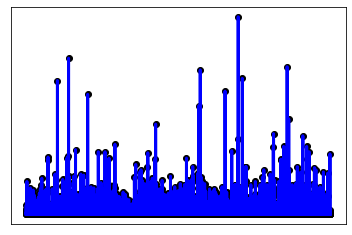

In [21]:
import matplotlib.pyplot as plt

print(X_test.shape)
print(y_test.shape)

X_test = np.arange(0,len(X_test),1)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


# Outliers

In [22]:
# Finding outlier
outliers = est2.get_influence()
leverage = outliers.hat_matrix_diag
dffits = outliers.dffits[0]
resid_stu = outliers.resid_studentized_external
cook = outliers.cooks_distance[0]
contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'),
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook')],axis = 1)
X_train.index = range(X_train.shape[0])
df_outliers = pd.concat([X_train,contat1], axis = 1)
print("\n.Outliers are:", np.where(np.abs(df_outliers.resid_stu)>2))



.Outliers are: (array([   30,    78,   119,   237,   252,   299,   301,   303,   360,
         448,   463,   488,   501,   574,   576,   653,   661,   680,
         715,   887,   929,   969,  1010,  1038,  1041,  1084,  1113,
        1200,  1278,  1301,  1321,  1327,  1373,  1379,  1413,  1447,
        1461,  1466,  1470,  1482,  1579,  1603,  1641,  1675,  1707,
        1721,  1732,  1756,  1798,  1868,  1896,  1905,  1972,  2008,
        2030,  2033,  2065,  2068,  2070,  2113,  2142,  2187,  2198,
        2210,  2311,  2313,  2520,  2528,  2565,  2568,  2584,  2625,
        2643,  2681,  2840,  2883,  2893,  2951,  2982,  2993,  3011,
        3012,  3051,  3053,  3066,  3137,  3156,  3203,  3250,  3408,
        3410,  3471,  3604,  3627,  3671,  3731,  3811,  3901,  3910,
        3963,  3968,  3993,  3994,  3995,  3996,  4039,  4094,  4099,
        4100,  4205,  4211,  4219,  4277,  4278,  4300,  4336,  4346,
        4394,  4397,  4409,  4451,  4462,  4543,  4622,  4680,  4738,
   

[ 30, 119, 166, 269, 299, 301, 303, 306, 320, 347, 360, 448, 463, 488, 501, 576, 661, 680, 684, 715, 874, 887, 929, 969, 1010, 1038, 1041, 1076, 1084, 1113, 1154, 1183, 1200, 1301, 1321, 1327, 1363, 1373, 1379, 1413, 1447, 1466, 1482, 1494, 1536, 1579, 1580, 1603, 1641, 1646, 1681, 1707, 1721, 1732, 1755, 1756, 1760, 1798, 1863, 1896, 1905, 1906, 1945, 1972, 2008, 2030, 2033, 2065, 2068, 2070, 2104, 2113, 2119, 2142, 2187, 2198, 2210, 2311, 2313, 2340, 2357, 2361, 2453, 2467, 2520, 2565, 2567, 2584, 2625, 2638, 2643, 2644, 2681, 2768, 2831, 2840, 2852, 2883, 2893, 2909, 2949, 2982, 3011, 3012, 3062, 3066, 3097, 3137, 3203, 3250, 3294, 3410, 3471, 3601, 3604, 3627, 3671, 3731, 3749, 3780, 3795, 3895, 3901, 3905, 3910, 3963, 3968, 3993, 3994, 3995, 3996, 4039, 4061, 4099, 4100, 4110, 4127, 4154, 4201, 4211, 4219, 4277, 4278, 4283, 4300, 4336, 4346, 4356, 4394, 4397, 4409, 4421, 4451, 4462, 4540, 4543, 4575, 4622, 4738, 4781, 4824, 4831, 4859, 4914, 4929, 4931, 4946, 4967, 4990, 5040, 5080, 5140, 5141, 5149, 5173, 5193, 5222, 5313, 5354, 5399, 5471, 5495, 5532, 5572, 5623, 5624, 5698, 5701, 5836, 5888, 5971, 6026, 6034, 6039, 6044, 6155, 6193, 6315, 6317, 6368, 6399, 6446, 6487, 6499, 6530, 6542, 6557, 6585, 6592, 6602, 6647, 6722, 6757, 6793, 6855, 6935, 7045, 7055, 7068, 7077, 7098, 7124, 7146, 7172, 7180, 7211, 7218, 7275, 7302, 7305, 7339, 7375, 7482, 7520, 7541, 7564, 7609, 7614, 7619, 7664, 7670, 7762, 7798, 7856, 7873, 7877, 7882, 7902, 7958, 7985, 8000, 8044, 8118, 8138, 8151, 8180, 8199, 8231, 8245, 8255, 8269, 8270, 8313, 8349, 8383, 8411, 8418, 8423, 8441, 8450, 8465, 8488, 8492, 8513, 8553, 8597, 8659, 8702, 8718, 8725, 8775, 8777, 8799, 8825, 8863, 8865, 8882, 8919, 8924, 8956, 8967, 8975, 8988, 9026, 9030, 9039, 9116, 9155, 9242, 9272, 9312, 9331, 9338, 9444, 9489, 9567, 9652, 9682, 9710, 9718, 9725, 9829, 9927, 9935, 9947, 9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242, 10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487, 10529, 10541, 10628, 10641, 10678, 10705, 10782, 10814, 10844, 10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084, 11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250, 11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530, 11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701, 11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014, 12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531, 12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860, 12863, 12887, 12924, 12968, 13100, 13181, 13226, 13267, 13277, 13314, 13330, 13357, 13508, 13626, 13691, 13746, 13750, 13759, 13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207, 14237, 14238, 14273, 14318, 14328]

.Outliers are: (array([   30,   119,   166,   269,   299,   301,   303,   306,   320,
         347,   360,   448,   463,   488,   501,   576,   661,   680,
         684,   715,   874,   887,   929,   969,  1010,  1038,  1041,
        1076,  1084,  1113,  1154,  1183,  1200,  1301,  1321,  1327,
        1363,  1373,  1379,  1413,  1447,  1466,  1482,  1494,  1536,
        1579,  1580,  1603,  1641,  1646,  1681,  1707,  1721,  1732,
        1755,  1756,  1760,  1798,  1863,  1896,  1905,  1906,  1945,
        1972,  2008,  2030,  2033,  2065,  2068,  2070,  2104,  2113,
        2119,  2142,  2187,  2198,  2210,  2311,  2313,  2340,  2357,
        2361,  2453,  2467,  2520,  2565,  2567,  2584,  2625,  2638,
        2643,  2644,  2681,  2768,  2831,  2840,  2852,  2883,  2893,
        2909,  2949,  2982,  3011,  3012,  3062,  3066,  3097,  3137,
        3203,  3250,  3294,  3410,  3471,  3601,  3604,  3627,  3671,
        3731,  3749,  3780,  3795,  3895,  3901,  3905,  3910,  3963,
        3968,  3993,  3994,  3995,  3996,  4039,  4061,  4099,  4100,
        4110,  4127,  4154,  4201,  4211,  4219,  4277,  4278,  4283,
        4300,  4336,  4346,  4356,  4394,  4397,  4409,  4421,  4451,
        4462,  4540,  4543,  4575,  4622,  4738,  4781,  4824,  4831,
        4859,  4914,  4929,  4931,  4946,  4967,  4990,  5040,  5080,
        5140,  5141,  5149,  5173,  5193,  5222,  5313,  5354,  5399,
        5471,  5495,  5532,  5572,  5623,  5624,  5698,  5701,  5836,
        5888,  5971,  6026,  6034,  6039,  6044,  6155,  6193,  6315,
        6317,  6368,  6399,  6446,  6487,  6499,  6530,  6542,  6557,
        6585,  6592,  6602,  6647,  6722,  6757,  6793,  6855,  6935,
        7045,  7055,  7068,  7077,  7098,  7124,  7146,  7172,  7180,
        7211,  7218,  7275,  7302,  7305,  7339,  7375,  7482,  7520,
        7541,  7564,  7609,  7614,  7619,  7664,  7670,  7762,  7798,
        7856,  7873,  7877,  7882,  7902,  7958,  7985,  8000,  8044,
        8118,  8138,  8151,  8180,  8199,  8231,  8245,  8255,  8269,
        8270,  8313,  8349,  8383,  8411,  8418,  8423,  8441,  8450,
        8465,  8488,  8492,  8513,  8553,  8597,  8659,  8702,  8718,
        8725,  8775,  8777,  8799,  8825,  8863,  8865,  8882,  8919,
        8924,  8956,  8967,  8975,  8988,  9026,  9030,  9039,  9116,
        9155,  9242,  9272,  9312,  9331,  9338,  9444,  9489,  9567,
        9652,  9682,  9710,  9718,  9725,  9829,  9927,  9935,  9947,
        9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242,
       10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487,
       10529, 10541, 10628, 10641, 10678, 10705, 10782, 10814, 10844,
       10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084,
       11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250,
       11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530,
       11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701,
       11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014,
       12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531,
       12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860,
       12863, 12887, 12924, 12968, 13100, 13181, 13226, 13267, 13277,
       13314, 13330, 13357, 13508, 13626, 13691, 13746, 13750, 13759,
       13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207,
       14237, 14238, 14273, 14318, 14328]),)

In [23]:
#Removeing Outliers
#df = newPlayers.drop(df_outliers)
no_out_DF = newPlayers.drop([ 30, 119, 166, 269, 299, 301, 303, 306, 320, 347, 360, 448, 463, 488, 501, 576, 661, 680, 684, 715, 887, 929, 969, 1010, 1038, 1041, 1076, 1084, 1113, 1154, 1183, 1200, 1301, 1321, 1327, 1363, 1373, 1379, 1413, 1447, 1466, 1482, 1494, 1536, 1579, 1580, 1603, 1641, 1646, 1681, 1707, 1721, 1732, 1755, 1756, 1760, 1798, 1863, 1896, 1905, 1906, 1945, 1972, 2008, 2030, 2033, 2068, 2070, 2104, 2113, 2119, 2142, 2187, 2198, 2210, 2311, 2313, 2340, 2357, 2361, 2453, 2467, 2520, 2565, 2567, 2584, 2625, 2638, 2643, 2644, 2681, 2768, 2831, 2840, 2852, 2883, 2893, 2909, 2949, 2982, 3011, 3012, 3062, 3066, 3097, 3137, 3203, 3250, 3294, 3410, 3471, 3601, 3604, 3627, 3671, 3731, 3749, 3780, 3795, 3895, 3901, 3905, 3910, 3963, 3968, 3993, 3994, 3995, 3996, 4039, 4061, 4099, 4100, 4110, 4127, 4154, 4201, 4211, 4219, 4277, 4278, 4283, 4300, 4336, 4346, 4356, 4394, 4397, 4409, 4421, 4451, 4462, 4540, 4543, 4575, 4622, 4738, 4781, 4824, 4831, 4859, 4914, 4929, 4931, 4946, 4967, 4990, 5040, 5080, 5140, 5141, 5149, 5173, 5193, 5222, 5313, 5354, 5399, 5471, 5495, 5532, 5572, 5623, 5624, 5698, 5701, 5836, 5888, 5971, 6026, 6034, 6039, 6044, 6155, 6193, 6315, 6317, 6368, 6399, 6446, 6487, 6499, 6530, 6557, 6585, 6592, 6602, 6647, 6722, 6757, 6793, 6855, 6935, 7045, 7055, 7068, 7077, 7098, 7124, 7146, 7172, 7180, 7211, 7218, 7275, 7302, 7305, 7339, 7375, 7482, 7520, 7541, 7564, 7609, 7614, 7619, 7664, 7670, 7762, 7798, 7856, 7873, 7877, 7882, 7902, 7958, 7985, 8000, 8044, 8118, 8138, 8151, 8180, 8199, 8231, 8245, 8255, 8269, 8270, 8313, 8349, 8383, 8411, 8418, 8423, 8450, 8465, 8488, 8492, 8513, 8553, 8597, 8659, 8702, 8718, 8725, 8775, 8777, 8799, 8825, 8863, 8865, 8882, 8919, 8924, 8956, 8967, 8975, 8988, 9026, 9030, 9039, 9116, 9155, 9242, 9272, 9312, 9331, 9338, 9444, 9489, 9567, 9652, 9682, 9710, 9718, 9725, 9829, 9927, 9935, 9947, 9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242, 10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487, 10529, 10541, 10641, 10678, 10705, 10782, 10814, 10844, 10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084, 11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250, 11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530, 11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701, 11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014, 12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531, 12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860, 12863, 12887, 12924, 12968, 13100, 13181, 13226, 13314, 13330, 13357, 13626, 13691, 13746, 13750, 13759, 13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207, 14237, 14238, 14273, 14318, 14328],)
#no_out_DF = no_out_DF.to_numpy()

#no_out_DF = no_out_DF.reshape(1,-1)

# Download Dataset to local

In [ ]:
from google.colab import files

newPlayers.to_csv("NRM_Data.csv")
files.download("NRM_Data.csv")

# Re-Standardization and Rebuilding the model

In [25]:
# Standardization
#import category_encoders as ce
from sklearn import preprocessing

newDF = no_out_DF

#=========== Preparing Data ======================#
new_Response_DF = newDF["NRM_Value_Mil"]
new_Features_DF = newDF.drop(['NRM_Value_Mil'], axis = 1)

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = new_Features_DF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if new_Features_DF.dtypes[feature] in z_dataType:
    z_list.append(feature)

for zz in z_list:
  new_Features_DF[zz] = preprocessing.scale(new_Features_DF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
#encoder = ce.OneHotEncoder(use_cat_names=True)
#newDF = encoder.fit_transform(newDF)
for feature in features:
  if new_Features_DF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

for dv in dv_list:

  if dv != 'Preferred Foot':
    dummy = "dummy_{}".format(dv)
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)
  else:
    dummy = "dummy_Preferred_Foot"
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)

  new_Features_DF = pd.concat([new_Features_DF,dummy], axis=1)

#Dropping Not used varaibles 
new_X_DF = new_Features_DF.drop((dv_list), axis=1)

# Precheck

In [26]:
# Finding any column with Null value 
new_X_DF.isnull().sum().sort_values(ascending=False)/new_X_DF.shape[0]

Age                0.0
K-League 1         0.0
Pro League         0.0
Premier League     0.0
Meiji Yasuda J1    0.0
                  ... 
GKPositioning      0.0
GKKicking          0.0
GKHandling         0.0
GKDiving           0.0
Medium-Medium      0.0
Length: 109, dtype: float64

# Preparing Final Data 

In [27]:
#=========== Preparing Data ======================#
y_1 = new_Response_DF
X_1 = new_X_DF

print(X_1.shape)
print(y_1.shape)

(17489, 109)
(17489,)


In [28]:
X_1.head()

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Right,2,3,4,5,2,3,4,5,2,3,4,5,Asia,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,DEF,GK,MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.267767,1.869485,2.534134,1.024413,2.132033,2.438364,2.201021,2.494536,2.930805,2.241218,2.256658,1.765949,1.452080,1.862464,3.673395,2.193165,1.717703,0.247961,0.556609,-0.497195,2.438568,-0.447193,-1.187653,2.255174,2.877546,1.689318,3.267957,-0.713874,-0.904851,-0.919811,-0.600204,-0.318995,-0.074551,-0.140007,-0.485263,-0.214502,-0.443968,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.695406,1.869485,2.482908,2.117737,1.520148,2.494889,1.725388,1.841854,1.900271,1.588658,2.136856,1.632251,1.792781,1.591539,3.783859,0.425504,2.298235,2.529132,1.561466,1.094575,2.386624,0.415807,-0.849433,2.306360,2.026985,2.326673,3.180630,-0.965588,-0.766262,-1.060897,-0.543672,-0.318995,-0.074551,-0.140007,-0.318027,0.900003,1.092744,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.198671,1.597207,2.124329,0.564066,1.724109,2.325314,2.148173,2.222585,2.530042,1.653914,2.196757,1.966495,1.724641,2.201121,3.562931,1.415394,1.427437,-0.343454,1.121841,-1.293080,1.815244,0.013073,-0.511213,1.999240,2.381385,2.071731,3.093303,-1.015931,-1.089635,-0.590609,-0.430606,-0.437308,-0.074551,-0.081220,-0.318027,0.231300,-1.020235,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.412491,-1.779048,-1.666370,-1.795213,-0.587456,-1.687961,-1.973979,-1.421560,-1.363085,-0.107998,-0.977978,-0.506905,-0.455844,-0.237205,3.121074,-1.483570,-1.417170,0.163473,-1.264692,-0.099252,-1.820810,-1.022527,-0.801116,-1.942135,1.034665,-0.541426,0.822803,-1.620043,-1.228223,-1.531184,4.148534,4.058609,4.292123,4.210205,4.308828,1.345804,0.132299,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.412491,2.359587,1.868201,0.161262,2.268007,2.212264,1.619692,2.059415,2.301034,2.502242,1.957154,0.896916,0.770679,1.049689,3.231538,0.920449,2.066023,-0.174478,1.687073,0.776221,2.282737,1.163740,0.696715,1.896867,2.877546,1.944260,2.569342,1.048121,0.481032,0.255909,-0.091411,-0.200681,-0.681033,-0.375154,-0.206537,-1.529617,-0.764116,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# LinearRegression 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

regr1 = LinearRegression()

#Building Model
X_train_lr , X_test_lr, y_train_lr, y_test_lr = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

# Fit the Model
regr1.fit(X_train_lr, y_train_lr)

#Predicting Test data 
lr_pred = regr1.predict(X_test_lr)
print(lr_pred)

print("RMSE: %.2f" %(mean_squared_error(y_test_lr, lr_pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test_lr,lr_pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test_lr, lr_pred))

[ 0.19970608  3.323083   -0.27146201 ... 10.59789539  0.64851965
  2.89066624]
RMSE: 3.12
Variance Score R-Squared: 0.67
MSE θ zero Intercept: 9.72


#Metrics to Evaluate Model 

In [ ]:
#Metrics to Evaluate Model 
print("Liner Regression:")
print(r2_score(y_test_lr, lr_pred), mean_absolute_error(y_test_lr, lr_pred), np.sqrt(mean_squared_error(y_test_lr, lr_pred)))
print("Decession Trees:")
print(r2_score(y_test_dt, dt_pred), mean_absolute_error(y_test_dt, dt_pred), np.sqrt(mean_squared_error(y_test_dt, dt_pred)))
print("Lasso Trees:")
print(r2_score(y_test_lasso, lasso_pred), mean_absolute_error(y_test_lasso, lasso_pred), np.sqrt(mean_squared_error(y_test_lasso, lasso_pred)))


# Classification

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

#y = lambda symbol: 'X' if symbol==True else 'O' if symbol==False else ' '
def get_class(a):
  if (a >= 75):
    return 'High'
  elif ((a <= 75) and (a >= 25)):
    return 'Medium'
  else:
    return 'low'

df_class = newDF

df_class['Class'] = df_class.apply(lambda x: get_class(x['NRM_Value_Mil']), axis = 1)

y_response_class = label_binarize(df_class['Class'], classes=[0,1,2])
#y_response_class = label_binarize(y_1, classes=[0,1,2])

n_classes = 3

# shuffle and split training and test sets
X_train_clfr, X_test_clfr, y_train_clfr, y_test_clfr = train_test_split(X_1, y_response_class, test_size=0.20, random_state=0)

# Classifier 
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train_clfr, y_train_clfr).decision_function(X_test_clfr)

clfr_prob= clf.predict_proba(X_test_clfr)
clfr_yhat = clf.predict(X_test_clfr)


In [ ]:
print("Classification Report : \n")
print(classification_report(y_train_clfr,clfr_yhat))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for cur_class in range(n_classes):
    fpr[cur_class], tpr[cur_class], _ = roc_curve(y_test_clfr[:, cur_class], y_score[:, cur_class ])  #, pos_label= 1)
    roc_auc[cur_class] = auc(fpr[cur_class], tpr[cur_class])
    plt.plot(fpr[cur_class],tpr[cur_class], marker='.', label='Class_0', color='b')

In [ ]:
pd.option_context('display.max_rows', None,)
#df_class.groupby('Class').count()
y_response_class

In [ ]:
# ================== Liner Regression ========================== #
regr_km = LinearRegression()

#Building Model
X_train_km , X_test_km, y_train_km, y_test_km = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

# Fit the Model
regr_km.fit(X_train_km, y_train_km)

#Predicting Test data 
lr_km_pred = regr_km.predict(X_test_km)
print(lr_km_pred)

# ================== Decession ================================== #
#Test Accuracy 
km_score = regr_km.score(X_test_km, y_test_km)
print("Model Accuracy : {}".format(km_score))

dt_km = DecisionTreeRegressor()
dt_km.fit(X_train_km, y_train_km)
dt_km_pred = dt_km.predict(X_test_km)

#Predicting Test data 
print(dt_km_pred)

#Test Accuracy 
dt_km_pred_score = dt_km.score(X_test_km, y_test_km)
print("Model Accuracy : {}".format(dt_km_pred_score))

# ===================== Lasso ================================== #
eps = 1e-3 # the smaller it is the longer is the path

#LassoCV default "number of alphas=100",you could set by yourself
km_lasso = LassoCV(eps=eps,cv=10) 
km_lasso.fit(X_train_km,y_train_km)
alphas = km_lasso.alphas_
alpha = km_lasso.alpha_
mse_path = km_lasso.mse_path_

km_lasso_pred = km_lasso.predict(X_test_km)

km_lasso_score = km_lasso.score(X_test_km, y_test_km)
print("Lasoo Model Accuracy : {}".format(km_lasso_score))

In [ ]:
#Metrics to Evaluate Model 
print("Liner Regression:")
print(r2_score(y_test_lr, lr_pred), mean_absolute_error(y_test_lr, lr_pred), np.sqrt(mean_squared_error(y_test_lr, lr_pred)))
print("Decession Trees:")
print(r2_score(y_test_dt, dt_pred), mean_absolute_error(y_test_dt, dt_pred), np.sqrt(mean_squared_error(y_test_dt, dt_pred)))
print("Lasso Trees:")
print(r2_score(y_test_lasso, lasso_pred), mean_absolute_error(y_test_lasso, lasso_pred), np.sqrt(mean_squared_error(y_test_lasso, lasso_pred)))

print("\n")
print("After Clusterning :")
print("Liner Regression:")
print(r2_score(y_test_km, lr_km_pred), mean_absolute_error(y_test_km, lr_km_pred), np.sqrt(mean_squared_error(y_test_km, lr_km_pred)))
print("Decession Trees:")
print(r2_score(y_test_km, dt_km_pred), mean_absolute_error(y_test_km, dt_km_pred), np.sqrt(mean_squared_error(y_test_km, dt_km_pred)))
print("Lasso Trees:")
print(r2_score(y_test_km, km_lasso_pred), mean_absolute_error(y_test_km, km_lasso_pred), np.sqrt(mean_squared_error(y_test_km, km_lasso_pred)))